# Task
Build and evaluate a deep learning model for handwritten digit classification using the MNIST dataset, including data preprocessing, batch normalization, dropout, training, visualization of training history, and final evaluation.

## Dataset loading

### Subtask:
Load the MNIST dataset using TensorFlow/Keras.


**Reasoning**:
Load the MNIST dataset using the provided function from tensorflow.keras datasets.



In [ ]:
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Preprocessing

### Subtask:
Normalize and flatten the image data.


**Reasoning**:
Normalize the pixel values and flatten the image data for both training and testing sets as required by the subtask instructions.



In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

x_train_flattened = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flattened = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

print(f"x_train_flattened shape: {x_train_flattened.shape}")
print(f"x_test_flattened shape: {x_test_flattened.shape}")

x_train_flattened shape: (60000, 784)
x_test_flattened shape: (10000, 784)


## Model architecture

### Subtask:
Build a deep neural network including hidden layers, batch normalization, and dropout.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout

input_shape = x_train_flattened.shape[1]
input_layer = Input(shape=(input_shape,))

x = Dense(512, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,890 (2.06 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

## Training

Compile and train the model, collecting training history.


**Reasoning**:
Compile and train the built Keras model using the specified optimizer, loss function, and metrics, while also using validation data and storing the training history.



In [ ]:
epochs = 10
batch_size = 32

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_flattened, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test_flattened, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8732 - loss: 0.4163 - val_accuracy: 0.9596 - val_loss: 0.1277
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9489 - loss: 0.1612 - val_accuracy: 0.9740 - val_loss: 0.0815
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9585 - loss: 0.1329 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9637 - loss: 0.1154 - val_accuracy: 0.9767 - val_loss: 0.0792
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9703 - loss: 0.0963 - val_accuracy: 0.9787 - val_loss: 0.0715
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9721 - loss: 0.0890 - val_accuracy: 0.9796 - val_loss: 0.0629
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9738 - loss: 0.0802 - val_accuracy: 0.9820 - val_loss: 0.0609
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9749 - loss: 0


The subtask is to analyze the distribution of categorical features. I will first identify the categorical features and then calculate and display the value counts for each of them.



## Visualization

### Subtask:
Plot training vs. validation accuracy and loss.

**Reasoning**:
Plot the training and validation accuracy and loss over epochs using the collected history to visualize the model's performance during training.

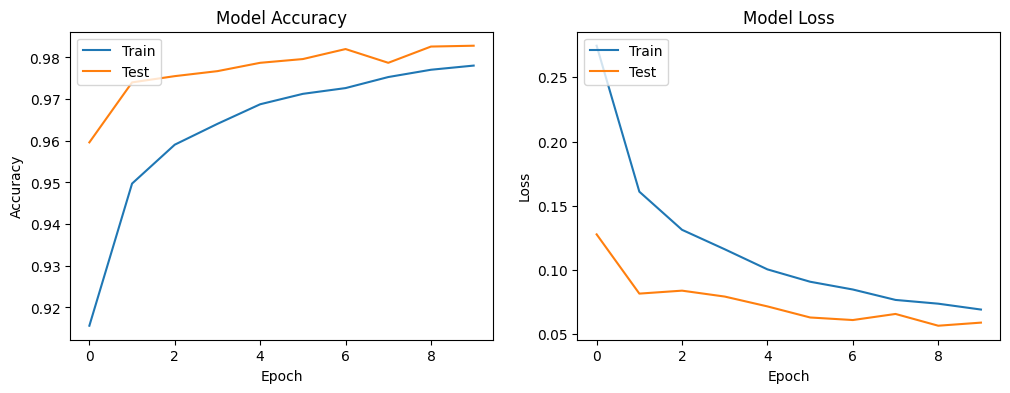

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Evaluation

Evaluate the model on the test set and report accuracy.

Evaluate the trained model on the test set to determine its performance on unseen data and report the final test accuracy.

In [ ]:
loss, accuracy = model.evaluate(x_test_flattened, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.0589
Test accuracy: 0.9828
